In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()
csvfile = list(uploaded.keys())[0]

Saving madfhantr.csv to madfhantr.csv


In [4]:
# Read Data
loandata = pd.read_csv('madfhantr.csv')
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loandata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# null data 삭제
# loandata = loandata.dropna(inplace=False)
loandata.dropna(inplace=True)

In [7]:
loandata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [17]:
# 분석할 데이터 선택
loandata = loandata[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]

# 문자 데이터 숫자로 바꿔주기
loandata['Gender'] = loandata['Gender'].replace(to_replace='Male', value='1')
loandata['Gender'] = loandata['Gender'].replace(to_replace='Female', value='0')

loandata['Married'] = loandata['Married'].replace(to_replace='Yes', value='1')
loandata['Married'] = loandata['Married'].replace(to_replace='No', value='0')

loandata['Education'] = loandata['Education'].replace(to_replace='Graduate', value='1')
loandata['Education'] = loandata['Education'].replace(to_replace='Not Graduate', value='0')

loandata['Self_Employed'] = loandata['Self_Employed'].replace(to_replace='Yes', value='1')
loandata['Self_Employed'] = loandata['Self_Employed'].replace(to_replace='No', value='0')

loandata['Property_Area'] = loandata['Property_Area'].replace(to_replace='Rural', value='1')
loandata['Property_Area'] = loandata['Property_Area'].replace(to_replace='Urban', value='0')
loandata['Property_Area'] = loandata['Property_Area'].replace(to_replace='Semiurban', value='2')

In [18]:
from sklearn.model_selection import train_test_split

x = loandata.drop(columns=['Loan_Status'])
y = loandata.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

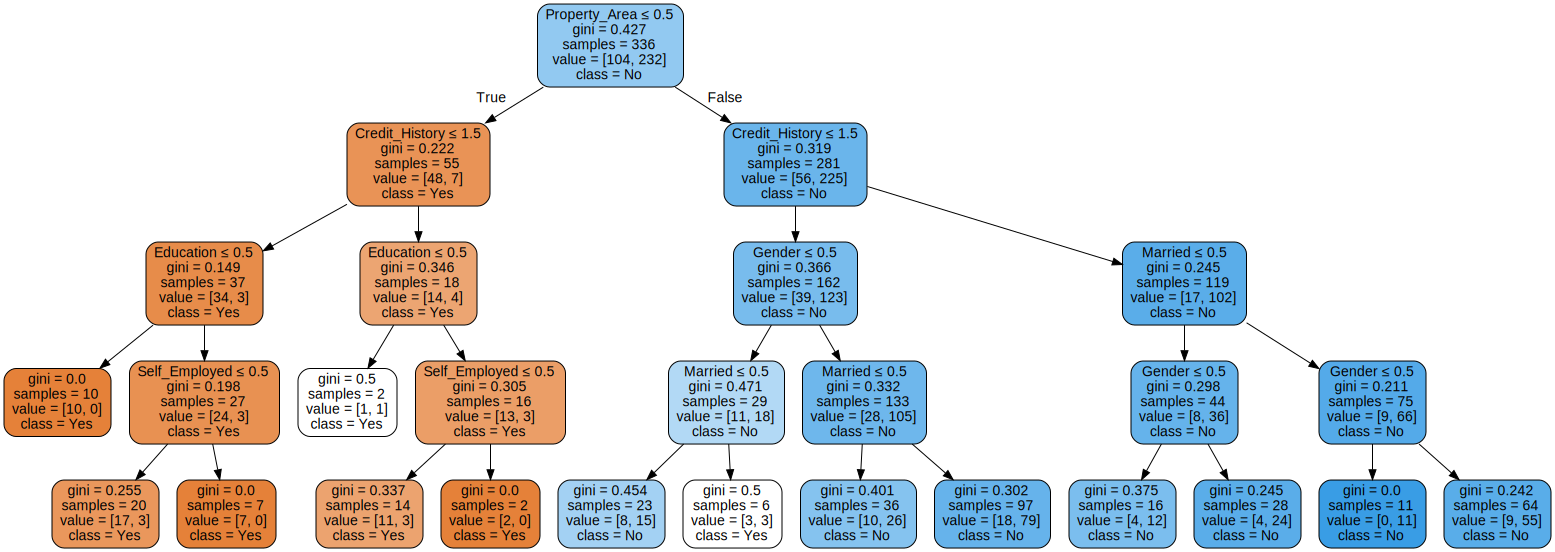

In [23]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=['Gender','Married','Education','Self_Employed', 'Property_Area', 'Credit_History'],
class_names=['Yes','No'],filled=True,
rounded=True,  
special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

In [26]:
clf.score(x_test,y_test)

0.8055555555555556